In [5]:
import numpy as np

class Perceptron:
    '''
    Parameters
    ==========
    eta: float
        Learning Rate
    
    n_iter: int
        epoch
    
    random_state: int
        seed for initializing weights with random numbers
    -----------
    Attributes
    ==========
    w_: 1d-array
        weights
        
    b_: Scalar
        bias
    
    errors_: list
        # of mis-classifications in each epoch
    '''
    
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        '''
        Parameters
        ==========
        X: {array-like}, shape = [n_examples, n_features]
            Training vectors, n_example: # of examples, n_features: # of features
        y: array-like, shape = [n_examples]
            Target values
        '''
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, 0) #step function

In [6]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    df = pd.read_csv(s,header=None,encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    df = pd.read_csv(s,header=None,encoding='utf-8')
    
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


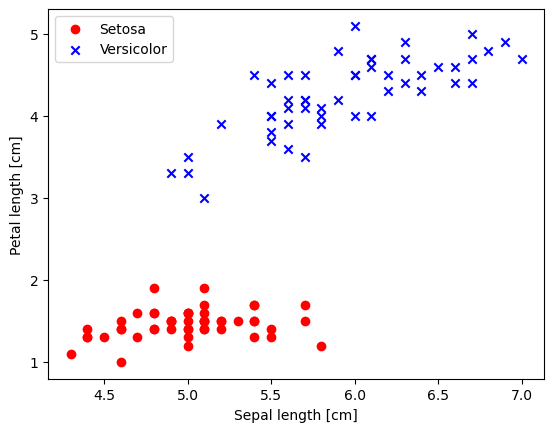

In [7]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100,4].values # get labels of first 100 data points
y = np.where(y == "Iris-setosa", 0, 1) # Iris-setosa: 0, else: 1

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values #input feature: (sepal length, petal length)

# plot data
plt.scatter(X[:50,0],X[:50,1], color='red', marker='o', label = "Setosa") #row 0-49: setosa
plt.scatter(X[50:100,0],X[50:100,1], color='blue', marker='x', label = "Versicolor") # row 50-100: versicolor

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend()

plt.show()

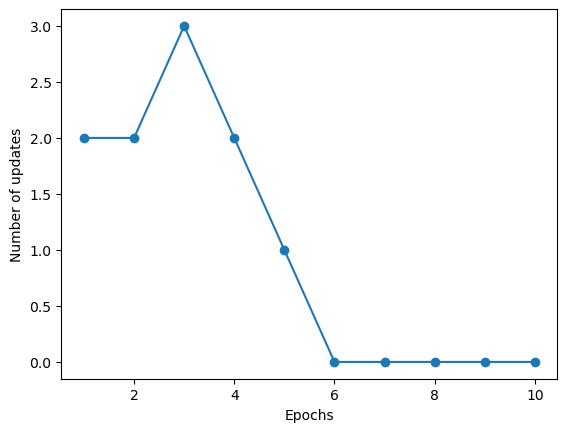

In [8]:
ppn = Perceptron(eta=0.1,n_iter=10)

ppn.fit(X,y)

plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()